# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# set this so the graphs open internally
%matplotlib inline

In [2]:
%config Completer.use_jedi = False

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter='\t')

### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a bar chart of the top 5 items bought

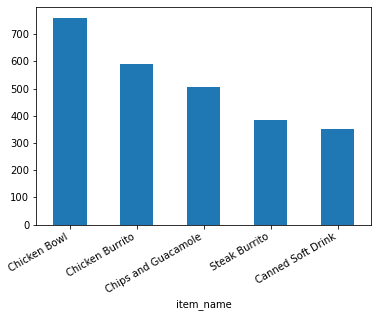

In [19]:
top_5_item = chipo.groupby('item_name').quantity.sum().sort_values(ascending=False).iloc[: 5]
ax = top_5_item.plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right');

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

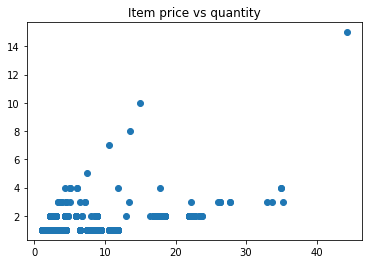

In [20]:
chipo['item_price'] = chipo.item_price.apply(lambda x : float(x.replace('$', '')))
plt.scatter(chipo.item_price, chipo.quantity)
plt.title('Item price vs quantity')
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

### List top 5 items with highest price

In [21]:
chipo.head(2)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39


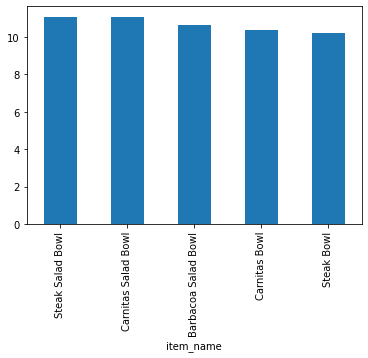

In [26]:
mean_price = chipo.groupby('item_name').agg(mean_quantity=('quantity', 'mean'), 
                                           mean_item_price=('item_price', 'mean'))

(mean_price.mean_item_price / mean_price.mean_quantity).sort_values(ascending=False).head(5).plot(kind='bar');

In [28]:
chipo.head(2)

,order_id,quantity,item_name,choice_description,item_price,price_per_item
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39


In [31]:
chipo['profit'] = chipo.item_price * 0.2

In [32]:
chipo.head(2)

,order_id,quantity,item_name,choice_description,item_price,price_per_item,profit
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,0.478
1,1,1,Izze,[Clementine],3.39,3.39,0.678


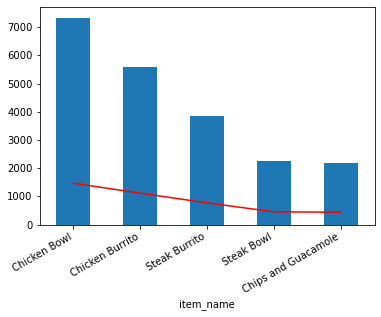

In [38]:
chipo.groupby('item_name').item_price.sum().nlargest(5).plot(kind='bar')
ax = chipo.groupby('item_name').profit.sum().nlargest(5).plot(color='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right');